<a href="https://colab.research.google.com/github/Seyoung-Jung/Tobigs-HW/blob/master/week7/week7_MINST_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framework Tutorial

*by tobigs 13기 김현선*

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
train_data = pd.read_csv('/content/drive/My Drive/Tobigs/week7_NeuralNetwork_Advanced/data/train_df.csv')
test_data = pd.read_csv('/content/drive/My Drive/Tobigs/week7_NeuralNetwork_Advanced/data/test_df.csv')
sample_submission = pd.read_csv("/content/drive/My Drive/Tobigs/week7_NeuralNetwork_Advanced/data/sample_submission.csv")

In [ ]:
# 어떤 자료인지 보자
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train_data.drop('label',axis = 1).values
y_train = train_data['label'].values

X_test = test_data.iloc[:,1:].values

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (18000, 784))

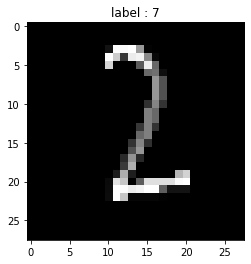

In [ ]:
# 하나 출력해볼까!

index = 0
image = X_train[index].reshape(28,28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [ ]:
# 전체 784 pixel, 즉, 28*28 사이즈의 그림들임!

image_size = X_train.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


In [5]:
# scaling

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

print('maximum value after scaling:', X_train.max(),
      '\nminimum value after scaling:' ,X_train.min())

maximum value after scaling: 1.0 
minimum value after scaling: 0.0


In [6]:
# train test split

X_train = X_train.reshape(-1, 28, 28,1)
X_test = X_test.reshape(-1, 28, 28,1)  # CNN의 경우 flatten 하기 이전의 형태로 reshape 필요

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(33600, 28, 28, 1) (33600,)
(8400, 28, 28, 1) (8400,)


## tensorflow keras model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2), 
    # dropout 대신 keras.layers.BatchNormalization() 이용 가능
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 1s 2ms/step - loss: 0.2128 - accuracy: 0.9375
Epoch 2/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9788
Epoch 3/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0455 - accuracy: 0.9856
Epoch 4/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 5/5
263/263 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9868


[0.050178878009319305, 0.9867857098579407]

기본 코드로는 0.9867의 정확도가 나온다.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2), 
    # dropout 대신 keras.layers.BatchNormalization() 이용 가능
    keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 1s 2ms/step - loss: 0.2175 - accuracy: 0.9349
Epoch 2/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9764
Epoch 3/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9851
Epoch 4/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9899
Epoch 5/5
263/263 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9857


[0.05087374895811081, 0.9857142567634583]

weight initializer를 명시해주는 건 성능의 효과를 보이지 않았다.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 1s 3ms/step - loss: 0.1453 - accuracy: 0.9557
Epoch 2/5
336/336 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 3/5
336/336 [==============================] - 1s 3ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 4/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 5/5
263/263 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9840


[0.06044118478894234, 0.9840475916862488]

Dropout을 빼고 BatchNormalization을 넣은 것도 효과를 보이지 않았다.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 1s 2ms/step - loss: 0.3007 - accuracy: 0.9094
Epoch 2/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0992 - accuracy: 0.9729
Epoch 3/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0.9822
Epoch 4/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9854
Epoch 5/5
263/263 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9861


[0.055190276354551315, 0.9860714077949524]

단순히 Dense 층이 깊어진다고 정확도가 높아지진 않는 것을 확인하였다.

In [ ]:
from keras.layers.advanced_activations import ELU

model = keras.Sequential([
    keras.layers.Dense(512, activation=ELU()),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=ELU()),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 1s 2ms/step - loss: 0.2176 - accuracy: 0.9346
Epoch 2/5
336/336 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9654
Epoch 3/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9731
Epoch 4/5
336/336 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9782
Epoch 5/5
263/263 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9781


[0.07742299139499664, 0.9780952334403992]

ELU도 ReLU보다 낮은 정확도를 보인다. 의미없다.


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=256)
model.evaluate(X_val, y_val)

Epoch 1/20
132/132 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.9021
Epoch 2/20
132/132 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9680
Epoch 3/20
132/132 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9778
Epoch 4/20
132/132 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9837
Epoch 5/20
132/132 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9882
Epoch 6/20
132/132 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 7/20
132/132 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9926
Epoch 8/20
132/132 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9934
Epoch 9/20
132/132 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 10/20
132/132 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9954

[0.059833232313394547, 0.9871428608894348]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_val, y_val)

Epoch 1/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2122 - accuracy: 0.9390
Epoch 2/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9768
Epoch 3/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9851
Epoch 4/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 5/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 6/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 7/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0204 - accuracy: 0.9936
Epoch 8/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 9/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 10/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0158 - accuracy: 0.9948

[0.06510520726442337, 0.9891666769981384]

두번째 hidden layer output 개수는 128로 두고 epoch는 20으로 높여주었다.

batch_size는 보통 64~512 사이가 적절하다고 하여 256과 64로 돌려본 결과 64일 때 정확도 0.9891로 가장 좋은 결과를 보였다.

기본 코드에서 다양하게 변화를 시도해보았지만 최대 정확도는 0.9891로 0.99를 넘지 못하는 한계를 보였다. 이유가 무엇일까? 이는 단순한 FC layer 구조의 한계라고 판단했다.

더 좋은 성능을 내보고자 구글링과 13기 우수코드를 참고한 결과 CNN 구조가 들어가야 한다는 것을 깨달았다. 아래는 우수코드 및 캐글 자료에서 코드 뼈대를 가져와 돌려본 결과이다.

(필수 옵션 이외의 부가적인 옵션은 제외하고 뼈대만 추가하였다.)

참고로 CNN 구조로 돌리기 위해선 X 데이터가 flat하지 않도록 reshape해줘야 한다. (위 코드에 split하기 전에 남겨두었다.)

지난 기수 우수 과제 코드와 해당 캐글 자료를 참고하였다.

(13기 우수 코드)
 https://github.com/tobigs-datamarket/tobigs-13th/blob/master/7wk_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%8B%AC%ED%99%94/%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%8B%AC%ED%99%94_13%EA%B8%B0%20%EC%A1%B0%EC%83%81%EC%97%B0.ipynb

(캐글 자료)
 https://www.kaggle.com/benanakca/kannada-mnist-cnn-tutorial-with-app-top-2

 CNN layer 구조가 추가되니 확연히 높아진 정확도를 낼 수 있었다. BatchNormalization()에서 다른 옵션들은 제외하고 gamma_initializer="normal"로 변경한 결과 아주 미세하게 더 높은 결과를 얻었다.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),
    keras.layers.Conv2D(64,  (3,3), padding='same'),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),
    keras.layers.Conv2D(64,  (3,3), padding='same'),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),

    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3,3), padding='same'),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),
    keras.layers.Conv2D(128,  (3,3), padding='same'),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),
    keras.layers.Conv2D(128,  (3,3), padding='same'),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),
    
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(256, (3,3), padding='same'),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),
    keras.layers.Conv2D(256,  (3,3), padding='same'),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),
   
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512, (3,3), padding='same'),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.ReLU(),
    
    keras.layers.MaxPooling2D(2,2),



    keras.layers.Flatten(),
    keras.layers.Dense(1024),
    keras.layers.ReLU(),
    keras.layers.BatchNormalization(gamma_initializer="normal"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=256)
model.evaluate(X_val, y_val)

Epoch 1/20
132/132 [==============================] - 10s 74ms/step - loss: 0.3355 - accuracy: 0.9657
Epoch 2/20
132/132 [==============================] - 10s 74ms/step - loss: 0.0237 - accuracy: 0.9943
Epoch 3/20
132/132 [==============================] - 10s 74ms/step - loss: 0.0154 - accuracy: 0.9960
Epoch 4/20
132/132 [==============================] - 10s 74ms/step - loss: 0.0117 - accuracy: 0.9968
Epoch 5/20
132/132 [==============================] - 10s 74ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 6/20
132/132 [==============================] - 10s 74ms/step - loss: 0.0074 - accuracy: 0.9979
Epoch 7/20
132/132 [==============================] - 10s 74ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 8/20
132/132 [==============================] - 10s 74ms/step - loss: 0.0077 - accuracy: 0.9980
Epoch 9/20
132/132 [==============================] - 10s 74ms/step - loss: 0.0048 - accuracy: 0.9984
Epoch 10/20
132/132 [==============================] - 10s 74ms/step - loss: 0.003

[0.02294524386525154, 0.9944047331809998]

또 다른 캐글 자료도 참고하였다.

https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

위에서 돌려본 CNN보다 구조가 더 간단하고 속도도 개선되었는데 성능은 비슷하게 높게 나오는 것을 확인하였다.

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=256)
model.evaluate(X_val, y_val)

Epoch 1/20
132/132 [==============================] - 4s 32ms/step - loss: 0.1641 - accuracy: 0.9506
Epoch 2/20
132/132 [==============================] - 4s 32ms/step - loss: 0.0377 - accuracy: 0.9892
Epoch 3/20
132/132 [==============================] - 4s 32ms/step - loss: 0.0271 - accuracy: 0.9919
Epoch 4/20
132/132 [==============================] - 4s 32ms/step - loss: 0.0190 - accuracy: 0.9944
Epoch 5/20
132/132 [==============================] - 4s 32ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 6/20
132/132 [==============================] - 4s 32ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 7/20
132/132 [==============================] - 4s 32ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 8/20
132/132 [==============================] - 4s 32ms/step - loss: 0.0111 - accuracy: 0.9968
Epoch 9/20
132/132 [==============================] - 4s 33ms/step - loss: 0.0086 - accuracy: 0.9977
Epoch 10/20
132/132 [==============================] - 4s 32ms/step - loss: 0.0086 - accura

[0.022453704848885536, 0.995119035243988]

마지막으로 돌려본 모델이 구조 효율 대비 높은 성능을 보여주었으므로 해당 결과를 kaggle에 제출하기로 한다.

(CNN 적용 전의 결과는 kaggle에 첫번째로 제출했었다.)

In [9]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [10]:
sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [11]:
sample_submission.to_csv("submission.csv",index=False)